<a href="https://colab.research.google.com/github/iyeboah22/GIS-DS/blob/main/ps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Mental Health Health Disorder Analysis**

 My goal is to use the dataset provided to make an easy to visualise format that you can gain an insight into how these issues are impacting lives; allowing for a deeper understanding of these conditions and the implications.

Some questions that are come up are...
What are the types of mental health disorder that people around the world suffer?

How many people in each country suffer mental health problems?

Are men or women more likely to have depression?

Which countries have the highest rate ? What depression disorder?

**Sources**
https://data.world/amitd
https://international.ipums.org/international/gis.shtml

In [414]:
#import libraries
import os, zipfile
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files

from google.colab import data_table
data_table.enable_dataframe_formatter()

!pip install mapclassify
import mapclassify
import matplotlib.pyplot as plt
import seaborn as sns

In [415]:
#Read in Mental health disorder data
! wget -q -O Mental_Data.csv  https://github.com/iyeboah22/GIS-DS/raw/main/Mental%20health%20Depression%20disorder%20Data.csv
mh_data = pd.read_csv('Mental_Data.csv')

#Read in country coordinates
! wget -q -O countries.csv  https://github.com/iyeboah22/GIS-DS/raw/main/countries%202.csv #aok: there is no such data file countries_2.csv in github! you need to upload it first
countries_coord =pd.read_csv('countries.csv')
countries_coord
#Using lat and long to get geo points
countries_coord = gpd.GeoDataFrame(countries_coord, geometry=gpd.points_from_xy(countries_coord.latitude, countries_coord.longitude))
countries_coord.head()


<ipython-input-415-64351f839cdc>:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mh_data = pd.read_csv('Mental_Data.csv')


,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


,country,latitude,longitude,name,geometry
0,AD,42.546245,1.601554,Andorra,POINT (42.54624 1.60155)
1,AE,23.424076,53.847818,United Arab Emirates,POINT (23.42408 53.84782)
2,AF,33.939110,67.709953,Afghanistan,POINT (33.93911 67.70995)
3,AG,17.060816,-61.796428,Antigua and Barbuda,POINT (17.06082 -61.79643)
4,AI,18.220554,-63.068615,Anguilla,POINT (18.22055 -63.06862)


In [416]:
mh_1 = mh_data.iloc[:6467]
#mh_1 = mh_data.iloc[:6468].copy()
#mh_1.drop(columns=['index'], inplace = True)
#mh_1.columns = ['name', 'code', 'year','schizo', 'bipolar','eating dis', 'anxiety','drug', 'depres','alcohol']
#mh_1.iloc[:, 2:] = mh_1.iloc[:, 2:].apply(pd.to_numeric)

mh_2 = mh_data.iloc[6469:54276]
mh_2.columns = mh_data.iloc[6468]
mh_2 = mh_2.iloc[:,:7].drop(columns = 6468)

mh_3 = mh_data.iloc[54277:102084]
mh_3.columns = mh_data.iloc[54276]
mh_3 = mh_3.iloc[:,:7].drop(columns = 54276)

mh_4 = mh_data.iloc[102085:]
mh_4.columns = mh_data.iloc[102084]
mh_4 = mh_4.iloc[:,:5].drop(columns = 102084)

In [417]:
Temp1 =pd.merge(mh_1, mh_2, how='left', on=['Entity', 'Code', 'Year'])
Temp2 = pd.merge(Temp1, mh_3, how='left', on=['Entity', 'Code', 'Year'])
mh_disorder = pd.merge(Temp2, mh_4, how='left', on=['Entity', 'Code', 'Year'])
mh_disorder.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence in males (%),Prevalence in females (%),Population_x,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population_y,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,3.499982,4.647815,12412000.000000,10.318504,4039.755763,12412000.000000,318435.81367
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,3.503947,4.655772,13299000.000000,10.32701,4046.256034,13299000.000000,329044.773956
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,3.508912,4.662066,14486000.000000,10.271411,4053.709902,14486000.000000,382544.572895
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,3.513429,4.669012,15817000.000000,10.376123,4060.203474,15817000.000000,440381.507393
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,3.515578,4.67305,17076000.000000,10.575915,4062.290365,17076000.000000,456916.645489


In [418]:
col_names = {'Entity': 'name',
             'Code': 'code',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo',
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol',
             'Prevalence in males (%)':'males',
             'Prevalence in females (%)':'females',
             '':''}

mh_disorder.rename(columns=col_names,inplace=True)
mh_disorder['schizo'] = pd.to_numeric(mh_disorder['schizo'], errors='coerce')
mh_disorder['bipolar'] = pd.to_numeric(mh_disorder['bipolar'], errors='coerce')
mh_disorder['eating dis'] = pd.to_numeric(mh_disorder['eating dis'], errors='coerce')
mh_disorder['anxiety'] = pd.to_numeric(mh_disorder['anxiety'], errors='coerce')
mh_disorder['drug'] = pd.to_numeric(mh_disorder['drug'], errors='coerce')
mh_disorder['males'] = pd.to_numeric(mh_disorder['males'], errors='coerce')
mh_disorder['females'] = pd.to_numeric(mh_disorder['females'], errors='coerce')
mh_disorder['Population_x'] = pd.to_numeric(mh_disorder['Population_x'], errors='coerce')
mh_disorder['Suicide rate (deaths per 100,000 individuals)'] = pd.to_numeric(mh_disorder['Suicide rate (deaths per 100,000 individuals)'], errors='coerce')
mh_disorder['Depressive disorder rates (number suffering per 100,000)'] = pd.to_numeric(mh_disorder['Depressive disorder rates (number suffering per 100,000)'], errors='coerce')
mh_disorder['Population_y'] = pd.to_numeric(mh_disorder['Population_y'], errors='coerce')
mh_disorder['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'] = pd.to_numeric(mh_disorder['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'], errors='coerce')



mh_disorder = mh_disorder.drop(columns= ['index'])
mh_disorder = mh_disorder.dropna()

mh_disorder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5487 entries, 0 to 6466
Data columns (total 17 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   name                                                                                                       5487 non-null   object 
 1   code                                                                                                       5487 non-null   object 
 2   year                                                                                                       5487 non-null   object 
 3   schizo                                                                                                     5487 non-null   float64
 4   bipolar                                                                 

In [419]:
country_mh = mh_disorder.merge(countries_coord, on='name',how='outer',indicator=True)
country_mh.rename(columns = {'country':'ISO'}, inplace = True)
country_mh.rename(columns = {'name':'COUNTRY'}, inplace = True)
country_mh = country_mh.dropna()
country_mh = country_mh.drop(columns=['Population_y', 'code']).rename(columns={'Population_x' : 'Population'}).dropna()

In [420]:
country_mh_2017 = country_mh_2017[country_mh['year']=='2017']

<ipython-input-420-aa663756f4d1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_mh_2017 = country_mh_2017[country_mh['year']=='2017']


In [421]:
! wget -q -O world.zip https://github.com/iyeboah22/GIS-DS/raw/main/World_Countries_Generalized.zip

zip_ref = zipfile.ZipFile('world.zip', 'r');
zip_ref.extractall();
zip_ref.close();

world_map = gpd.read_file('World_Countries_Generalized/World_Countries_Generalized.shp')

In [ ]:
mh_map = pd.merge(world_map,country_mh_2017, on='COUNTRY')

mh_map = mh_map.drop("ISO_y",axis=1)
mh_map = mh_map.drop("geometry_y",axis=1)

mh_map.rename(columns = {'ISO_x':'ISO'}, inplace = True)
mh_map.rename(columns = {'geometry_x':'geometry'}, inplace = True)

mh_map = mh_map.dropna()

<Axes: >

[]

[]

<Axes: >

[]

[]

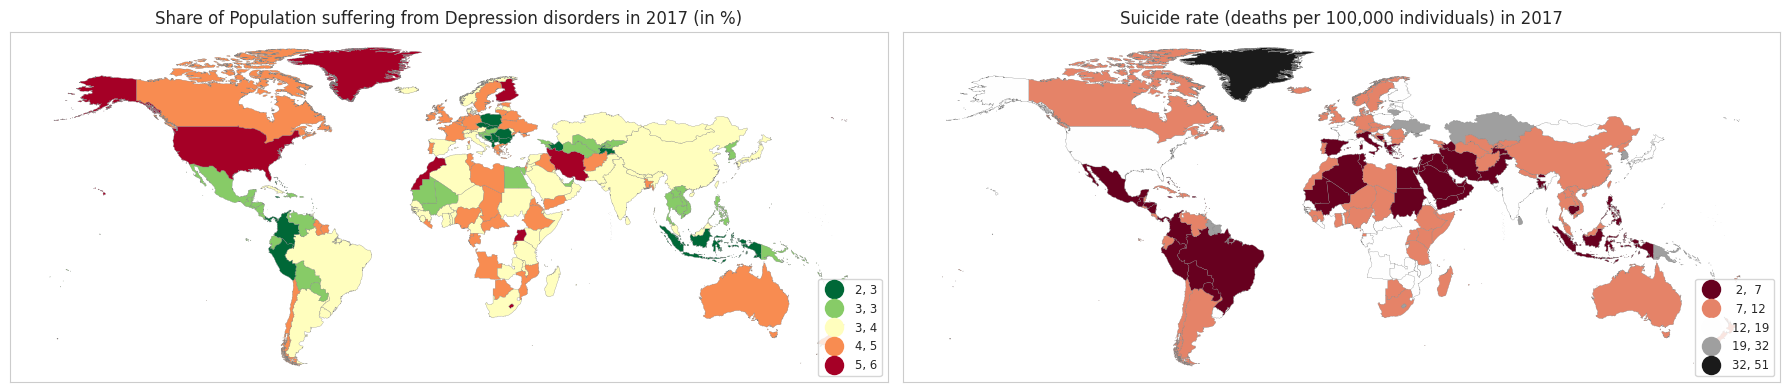

In [423]:
fig, axs = plt.subplots(1,2, figsize=(18,15),sharey=True, tight_layout=True)
mh_map.plot(ax=axs[0],column='depres',legend=True,cmap='RdYlGn_r',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Share of Population suffering from Depression disorders in 2017 (in %)")
axs[0].set_xticks([]); axs[0].set_yticks([])

mh_map.plot(ax=axs[1],column='Suicide rate (deaths per 100,000 individuals)',legend=True,cmap='RdGy',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Suicide rate (deaths per 100,000 individuals) in 2017")
axs[1].set_xticks([]); axs[1].set_yticks([])



In [424]:
country_mh_2010 = country_mh_2010[country_mh['year']=='2010']
mh_map1 = pd.merge(world_map,country_mh_2010, on='COUNTRY')

mh_map1.rename(columns = {'ISO_x':'ISO'}, inplace = True)
mh_map1.rename(columns = {'geometry_x':'geometry'}, inplace = True)

mh_map1 = mh_map1.dropna()



<ipython-input-424-a867cae50069>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_mh_2010 = country_mh_2010[country_mh['year']=='2010']


<Axes: >

[]

[]

<Axes: >

[]

[]

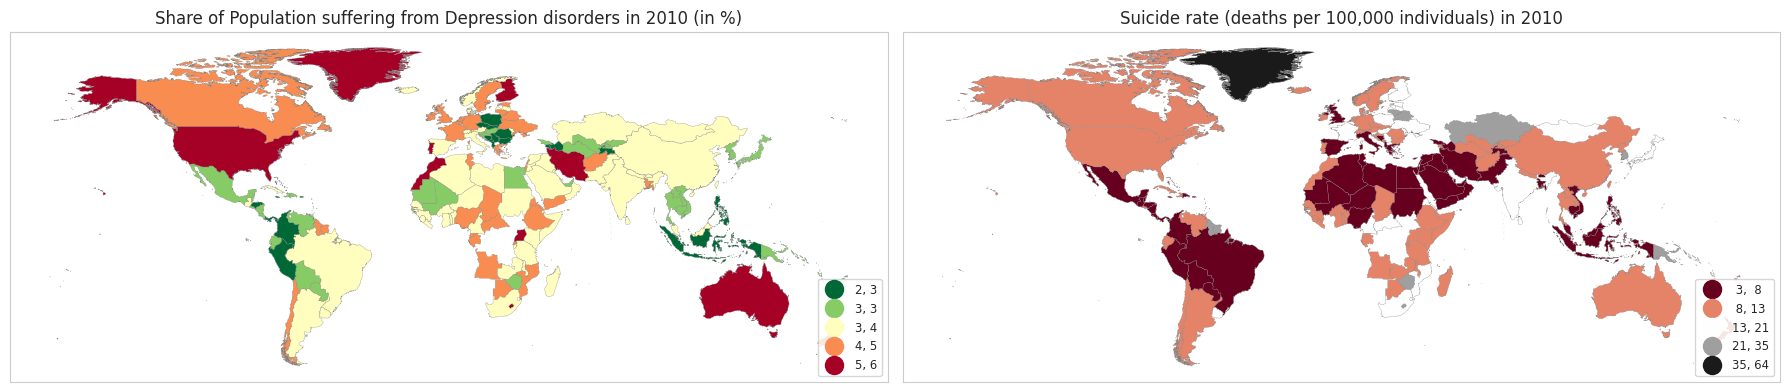

In [425]:
fig, axs = plt.subplots(1,2, figsize=(18,15),sharey=True, tight_layout=True)
mh_map1.plot(ax=axs[0],column='depres',legend=True,cmap='RdYlGn_r',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Share of Population suffering from Depression disorders in 2010 (in %)")
axs[0].set_xticks([]); axs[0].set_yticks([])

mh_map1.plot(ax=axs[1],column='Suicide rate (deaths per 100,000 individuals)',legend=True,cmap='RdGy',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Suicide rate (deaths per 100,000 individuals) in 2010")
axs[1].set_xticks([]); axs[1].set_yticks([])

<Figure size 1500x700 with 0 Axes>

<Axes: xlabel='COUNTRY', ylabel='depres'>

Text(0.5, 1.0, 'Highest rates of Depression disoder in 2010')

Text(0.5, 0, 'Countries')

Text(0, 0.5, 'Average population %')

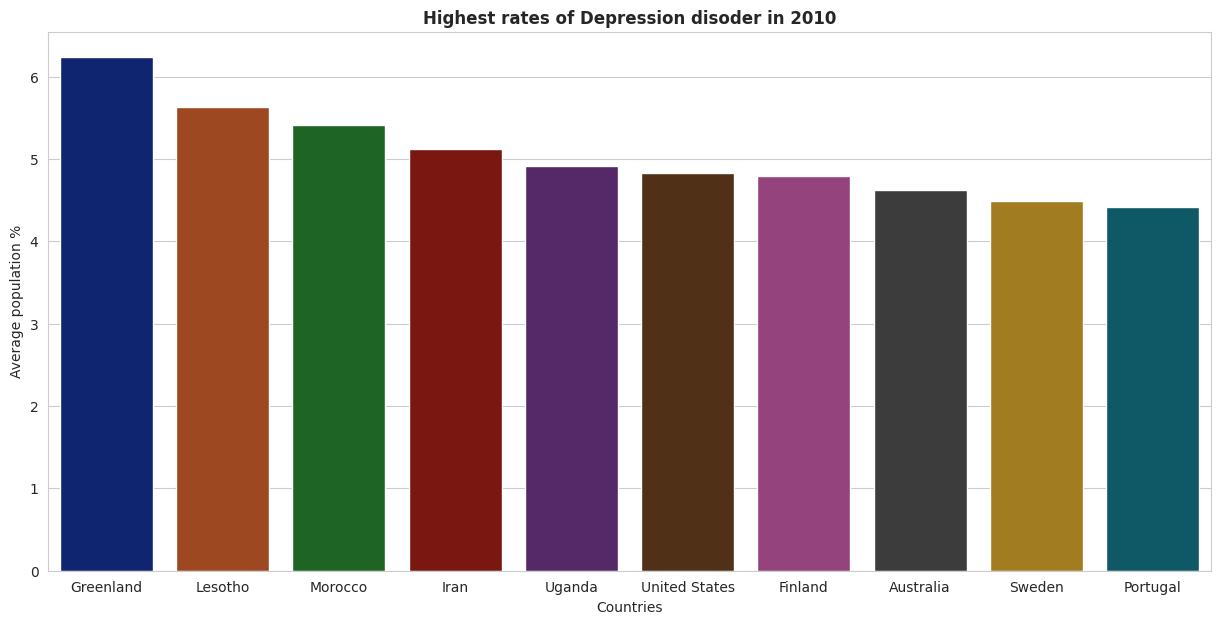

In [426]:
plt.figure(figsize = (15,7))
sns.barplot(data = mh_map,
            x = 'COUNTRY',
            y = 'depres',
            order = mh_map.sort_values('depres', ascending = False).COUNTRY.head(10),
            palette = 'dark')

#Set title, legend and x y axis
plt.title('Highest rates of Depression disoder in 2010',
          fontweight='bold')

plt.xlabel('Countries')
plt.ylabel('Average population %')

<Figure size 1500x700 with 0 Axes>

<Axes: xlabel='COUNTRY', ylabel='depres'>

Text(0.5, 1.0, 'Highest rates of Depression disoder in 2010')

Text(0.5, 0, 'Countries')

Text(0, 0.5, 'Average population %')

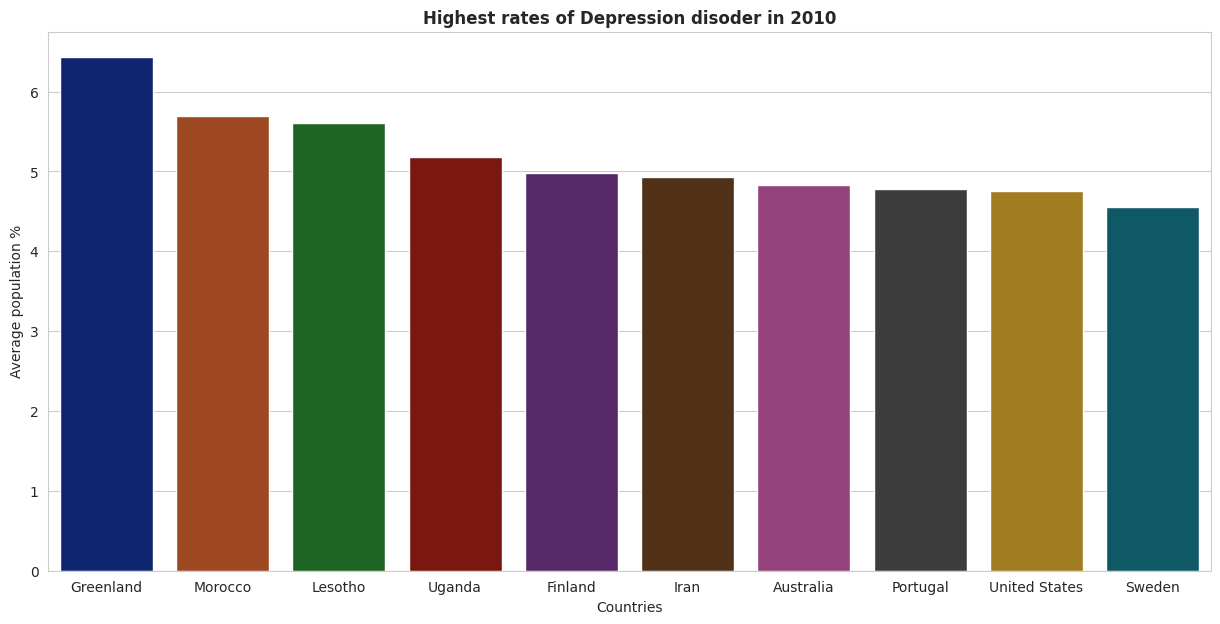

In [427]:
plt.figure(figsize = (15,7))
sns.barplot(data = mh_map1,
            x = 'COUNTRY',
            y = 'depres',
            order = mh_map1.sort_values('depres', ascending = False).COUNTRY.head(10),
            palette = 'dark')

#Set title, legend and x y axis
plt.title('Highest rates of Depression disoder in 2010',
          fontweight='bold')

plt.xlabel('Countries')
plt.ylabel('Average population %')

Which countries have the highest suicide rate?

<Figure size 700x700 with 0 Axes>

<Axes: xlabel='Suicide rate (deaths per 100,000 individuals)', ylabel='COUNTRY'>

Text(0.5, 1.0, 'Highest Suicide rate in 2017(deaths per 100,000 individuals)')

Text(0.5, 0, 'Suicide rate %')

Text(0, 0.5, 'COUNTRY')

<Figure size 700x700 with 0 Axes>

<Axes: xlabel='Suicide rate (deaths per 100,000 individuals)', ylabel='COUNTRY'>

Text(0.5, 1.0, 'Highest Suicide rate in 2010(deaths per 100,000 individuals)')

Text(0.5, 0, 'Suicide rate %')

Text(0, 0.5, 'COUNTRY')

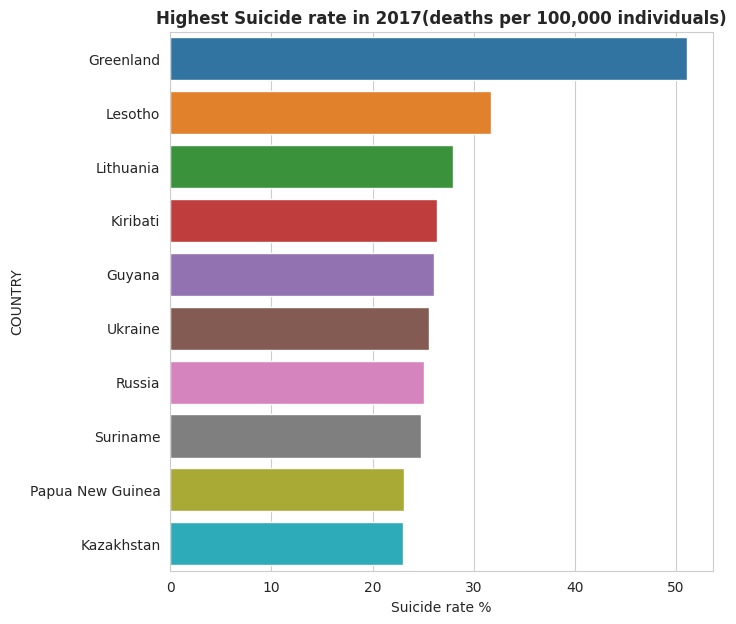

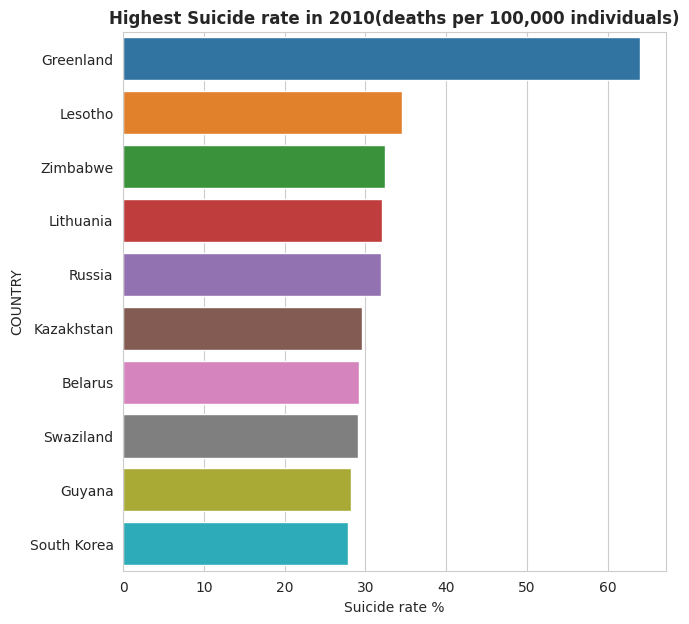

In [431]:
suicidepercountry= country_mh_2017.groupby('COUNTRY')[['Suicide rate (deaths per 100,000 individuals)']].mean().reset_index()

plt.figure(figsize = (7,7))
sns.barplot(data = suicidepercountry,
            x = 'Suicide rate (deaths per 100,000 individuals)',
            y = 'COUNTRY',
            order = suicidepercountry.sort_values('Suicide rate (deaths per 100,000 individuals)', ascending = False).COUNTRY.head(10))

#Set title, legend and x y axis
plt.title('Highest Suicide rate in 2017(deaths per 100,000 individuals)',
          fontweight='bold')

plt.xlabel('Suicide rate %')
plt.ylabel('COUNTRY')

suicidepercountry1= country_mh_2010.groupby('COUNTRY')[['Suicide rate (deaths per 100,000 individuals)']].mean().reset_index()

plt.figure(figsize = (7,7))
sns.barplot(data = suicidepercountry1,
            x = 'Suicide rate (deaths per 100,000 individuals)',
            y = 'COUNTRY',
            order = suicidepercountry1.sort_values('Suicide rate (deaths per 100,000 individuals)', ascending = False).COUNTRY.head(10))

#Set title, legend and x y axis
plt.title('Highest Suicide rate in 2010(deaths per 100,000 individuals)',
          fontweight='bold')

plt.xlabel('Suicide rate %')
plt.ylabel('COUNTRY')

In [ ]:
Greenland = country_mh[country_mh['COUNTRY'] == 'Greenland']
Greenland.set_index('year')

In [ ]:
plt.figure(figsize = (17,10))
sns.set_style('whitegrid')

sns.lineplot(data=Greenland, x="year", y="Suicide rate (deaths per 100,000 individuals)", label="Suicide rate")


plt.title('Suicide rate (deaths per 100,000 individuals) on Greenland',
          fontweight='bold')
plt.ylabel('Deaths per 100,000 individuals')
plt.xlabel('Years')


plt.grid(False)



**Greenland continuously has the highest rate of suicide, an occurrence commonly involving feelings of isolation and depression (Hersher, 2016). Inuit Indigenous peoples make up 89% of Greenland's population which means that mental health issues are particularly prevalent in Inuit communities (Chow, 2019).**

**Why is the majority of Greenland so depressed?**

**Greenland is culturally and geographically isolated as well as one of the coldest and least populous nations in the world. Although factors such as these have been known to contribute to suicide-related issues, it remains unclear if they have a direct influence on Greenlandic suicides or to what degree.**

In [ ]:
US = country_mh[country_mh['COUNTRY'] == 'United States']
US.set_index('year')

In [ ]:
plt.figure(figsize = (17,10))
sns.set_style('whitegrid')

sns.lineplot(data=US, x="year", y="Suicide rate (deaths per 100,000 individuals)", label="Suicide rate")


plt.title('Suicide rate (deaths per 100,000 individuals) on United States',
          fontweight='bold')
plt.ylabel('Deaths per 100,000 individuals')
plt.xlabel('Years')


plt.grid(False)
